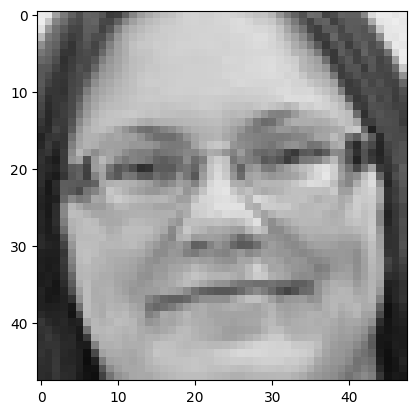

In [1]:
import tensorflow as tf
import cv2

import os
import matplotlib.pyplot as plt
import numpy as np
img_array = cv2.imread("train/3/Training_1206.jpg")
img_array.shape
plt.imshow(img_array)

In [2]:
print (img_array)

[[[234 234 234]
  [231 231 231]
  [160 160 160]
  ...
  [235 235 235]
  [229 229 229]
  [234 234 234]]

 [[237 237 237]
  [197 197 197]
  [132 132 132]
  ...
  [232 232 232]
  [237 237 237]
  [231 231 231]]

 [[224 224 224]
  [152 152 152]
  [113 113 113]
  ...
  [230 230 230]
  [232 232 232]
  [233 233 233]]

 ...

 [[ 48  48  48]
  [ 45  45  45]
  [ 56  56  56]
  ...
  [ 15  15  15]
  [ 22  22  22]
  [ 37  37  37]]

 [[ 45  45  45]
  [ 45  45  45]
  [ 57  57  57]
  ...
  [ 16  16  16]
  [ 21  21  21]
  [ 31  31  31]]

 [[ 45  45  45]
  [ 42  42  42]
  [ 55  55  55]
  ...
  [ 19  19  19]
  [ 26  26  26]
  [ 24  24  24]]]


In [3]:
img_array.shape

(48, 48, 3)

In [4]:
Datadirectory = "train/"

In [5]:
Classes = ["0","1","2","3","4","5","6"] ## list of classes => exact name of folders 

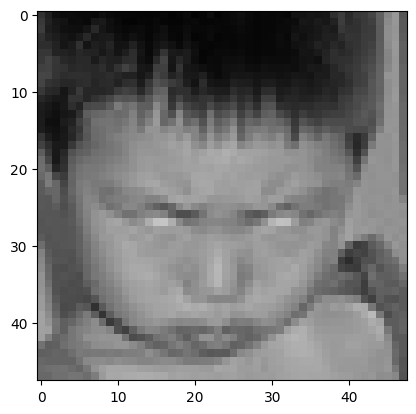

In [6]:
for category in Classes:
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break



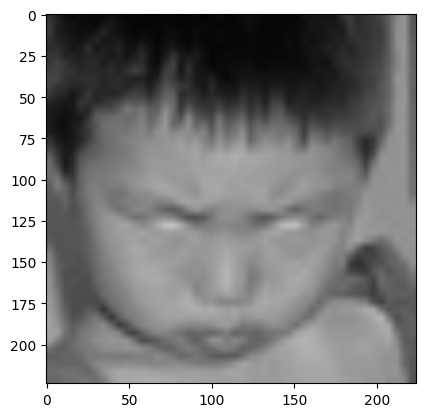

In [7]:
img_size= 224 ## ImageNet => 224*224
new_array= cv2.resize(img_array, (img_size,img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

In [8]:
new_array.shape

(224, 224, 3)

# Read all the images and convertin them to array

In [9]:
import os
import cv2

train_Data = []  # Data array
Datadirectory = "train/"
Classes = ["0","1","2","3","4","5","6"]  # Example classes
img_size = 224  # Example size

def create_train_Data():
    global train_Data
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category)  # Label
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_array = cv2.resize(img_array, (img_size, img_size))
                train_Data.append([new_array, class_num])
            except Exception as e:
                print(f"Error processing {os.path.join(path, img)}: {e}")


In [10]:
create_train_Data()
print("hello")

hello


In [11]:
print(len(train_Data))
print("hello world")

28709
hello world


# Training and Deploying for real time Webcam Demo

In [12]:
import random
random.shuffle(train_Data)


In [13]:
X = [] ## data/features
y = [] ## Lables

for features,label in train_Data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, img_size, img_size, 3) ## converting it ot 4 dimension

In [14]:
X.shape

(28709, 224, 224, 3)

## Normalizing the data by createing data pipelines that load and preprocess data on the fly without keeping the entire dataset in memory.

In [15]:
import tensorflow as tf

def normalize(image, label):
    image = tf.cast(image, tf.float32) / 143.0
    return image, label

# Create a dataset from X and y
dataset = tf.data.Dataset.from_tensor_slices((X, y))
dataset = dataset.map(normalize).batch(32)

In [16]:
type(y)


list

In [17]:
y[0]

0

In [18]:
Y = np.array(y)

In [22]:
Y.shape

(28709,)

# Deep Learning Model for training - Transfer Learning

In [23]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [24]:
model = tf.keras.applications.MobileNetV2()  ## Pre-trained Model

In [25]:
model.summary()

Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 3,538,984 (13.50 MB)

 Trainable params: 3,504,872 (13.37 MB)

 Non-trainable params: 34,112 (133.25 KB)

## Transfer Learning - Tuning , Weights will start from last check point

In [26]:
base_input = model.layers[0].input

In [27]:
base_output = model.layers[-2].output

In [28]:
base_output

<KerasTensor shape=(None, 1280), dtype=float32, sparse=False, name=keras_tensor_310>

In [29]:
final_output = layers.Dense(128)(base_output) ## adding new layer, after the of global pooling layer 

final_ouput = layers.Activation('relu')(final_output) ## activation function

final_output = layers.Dense(64)(final_ouput)

final_ouput = layers.Activation('relu')(final_output)

final_output = layers.Dense(7, activation='softmax')(final_ouput) ## total clases = 7

In [30]:
final_output

<KerasTensor shape=(None, 7), dtype=float32, sparse=False, name=keras_tensor_316>

In [31]:
from keras.layers import Input

base_input = Input(shape=(224, 224, 3))  # Example input

new_model = keras.Model(inputs = base_input, outputs= final_output)

In [32]:
new_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,430,663 (9.27 MB)

 Trainable params: 2,396,551 (9.14 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [33]:
new_model.compile(loss="sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [34]:
from keras.models import Model
from keras.layers import Input, Flatten, Dense
from keras.utils import to_categorical
import numpy as np

# Example model
base_input = Input(shape=(224, 224, 3))
x = Flatten()(base_input)
final_output = Dense(7, activation="softmax")(x)
new_model = Model(inputs=base_input, outputs=final_output)

# Compile the model
new_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Example data
X = np.random.rand(100, 224, 224, 3).astype("float32")  # 100 samples of shape 224x224x3
Y = np.random.randint(0, 7, size=(100,))  # 100 integer labels
Y = to_categorical(Y, num_classes=7)  # Convert to one-hot encoding

# Train the model
new_model.fit(X, Y, epochs=25)


Epoch 1/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.0980 - loss: 38.5404 
Epoch 2/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2130 - loss: 111.8703 
Epoch 3/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1371 - loss: 51.0353
Epoch 4/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2027 - loss: 59.6144 
Epoch 5/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1420 - loss: 34.4467 
Epoch 6/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4973 - loss: 16.4300 
Epoch 7/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3237 - loss: 29.6742
Epoch 8/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4868 - loss: 14.8627
Epoch 9/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6207 - loss: 6.3693 
Epoch 10/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6885 - loss: 6.5428 
Epoch 11/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7122 - loss: 4.7478 
Epoch 12/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7592 - loss:

In [35]:
new_model.save('my_model_64p35.h5')

In [36]:
import os

print(os.getcwd())  # Get the current working directory
print(os.path.exists('my_model_64p35.h5'))  # Check if the file exists


c:\python\ai training\ML Training
True


In [37]:
new_model = tf.keras.models.load_model('my_model_64p35.h5')

In [38]:
print(os.listdir())  # List all files in the current directory


['20240824_170857.jpg', 'ai.ipynb', 'ai.py', 'haarcascade_frontalface_default.xml', 'main.py', 'my-notebook.ipynb', 'my_model_64p35.h5', 'my_model_64p35.keras', 'test', 'timage.jpg', 'train', 'train image.jpg', 'yolov8n.pt', 'yrc.py']


In [39]:
frame = cv2.imread("train image.jpg")

In [40]:
frame.shape

(4080, 3060, 3)

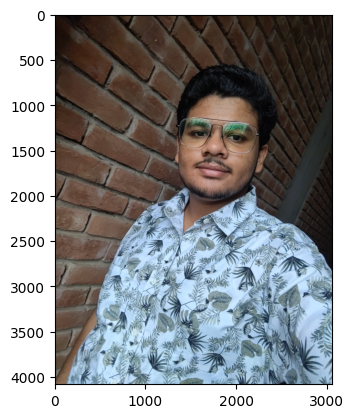

In [41]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# We need face detection algorithm (works on gray images)

In [42]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [43]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [44]:
gray.shape

(4080, 3060)

In [1]:
import cv2

# Load the Haar cascade for face detection
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Open a video feed or read an image
cap = cv2.VideoCapture(0)  # Replace 0 with your video file path if needed

while True:
    ret, frame = cap.read()
    if not ret:
        print("Failed to capture frame")
        break

    # Convert the frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces
    faces = faceCascade.detectMultiScale(gray, 1.1, 4)
    for (x, y, w, h) in faces:
        # Extract regions of interest
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]

        # Draw a rectangle around the face
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)

        # Example: Detect nested features (e.g., eyes) if needed
        # eyeCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
        # eyes = eyeCascade.detectMultiScale(roi_gray)
        # for (ex, ey, ew, eh) in eyes:
        #     cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)

    # If no faces are detected
    if len(faces) == 0:
        print("Face not detected")

    # Display the result
    cv2.imshow('Face Detection', frame)

    # Exit on pressing 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video feed and close windows
cap.release()
cv2.destroyAllWindows()


Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected


KeyboardInterrupt: 

In [2]:
faces = faceCascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in faces:
 roi_gray = gray[y:y+h, x:x+w]
 roi_color = frame [y:y+h, x:x+w]
 cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
 facess = faceCascade.detectMultiScale(roi_gray)
if len(facess) == 0:
 print("Face not detected")
else:
 for (ex, ey, ew, eh) in facess:
     face_roi = roi_color[ey: ey+eh, ex:ex+ew]

In [3]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

NameError: name 'plt' is not defined

In [5]:
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))

NameError: name 'plt' is not defined

In [59]:
# Example: Reading an image and converting to RGB
image = cv2.imread('train image.jpg')  # Replace with your image path
backtorgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Resizing the image
final_image = cv2.resize(backtorgb, (224, 224))
final_image = np.expand_dims(final_image, axis=0)
final_image = final_image / 255.0


In [60]:
final_image = cv2.resize(face_roi, (224,224))
final_image = np.expand_dims(final_image, axis=0) ## adding 4th dimension as it is needed
final_image = final_image / 255.0 ## normalizing the data

In [61]:
Predictions = new_model.predict(final_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


In [62]:
Predictions[0]

array([1.16671845e-02, 3.21072221e-05, 6.27200070e-09, 1.88151773e-07,
       2.39661895e-02, 9.64334071e-01, 2.19296410e-07], dtype=float32)

In [64]:
import numpy as np
np.argmax(Predictions)

5

In [83]:
font_scale = 1.5
font = cv2.FONT_HERSHEY_SIMPLEX

rectangle_bgr = (255, 255, 255)

cap = cv2.VideoCapture(0)  # Use the default webcam (index 0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")

faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

while True:
    ret, frame = cap.read()
    if not ret:
        print("Failed to grab frame.")
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=4)

    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        
        # Draw rectangle around the face
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
        
        # Prepare the face for prediction
        face_roi = cv2.resize(roi_color, (224, 224))
        face_roi = np.expand_dims(face_roi, axis=0)  # Add batch dimension
        face_roi = face_roi / 255.0  # Normalize

        # Predictions (Ensure `new_model` is loaded)
        # Predictions = new_model.predict(face_roi)
        # Simulating predictions for demonstration:
        Predictions = np.random.rand(1, 6)  # Mock prediction
        status = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Neutral"][np.argmax(Predictions)]

        # Display the emotion
        cv2.putText(frame, status, (x, y-10), font, font_scale, (0, 255, 0), 2)

    # Show the video frame
    cv2.imshow('Face Emotion Recognition', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()





KeyboardInterrupt: 